# Individual ML Project - Efecan Bahcivanoglu
----------

This dataset is composed of 1400 samples with 26 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features, except for the last column which is categorical (with 2 categories).

Your task is the following: you should compare the performance of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression) with that of
a Random Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).



## Index:    <a class="anchor" id="index"></a>
* [Index](#index)
* [Explatory Analysis](#first-bullet)
* [Scaling - Standardizing Numerical Features](#second-bullet)
* [Principal Component Analysis](#third-bullet)
* [Train-Test Split](#fourth-bullet)
* [Training Models](#fifth-bullet)
 * Training Logistic Regression
 * Hyperparameter Tuning Logistic Regression
 * Training RandomForestClassifier 
 * Hyperparameter Tuning RandomForestClassifier 
* [Extra Classifier - MLP Classifier](#seventh-bullet)
* [Performance Check](#eighth-bullet)
* [Conclusion](#ninth-bullet)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn.cluster
from sklearn.preprocessing import scale
from sklearn import metrics
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
df = pd.read_csv("mldata_0013086205.csv")

# Summary Statistics and Preparation of Data

In [3]:
df.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,categorical_feature_1
0,0,0,-2.113796,0.577348,0.087791,-1.839633,-0.060875,0.019704,-3.688619,-0.335890,...,1.872541,-3.656041,-2.526945,-8.241272,0.807575,-3.249814,0.978852,3.734944,-0.104832,B
1,1,1,2.409436,1.471901,-0.609170,-1.150151,-0.171056,-1.412171,1.581023,-0.373758,...,2.879667,-2.054909,0.598488,-6.480448,0.682403,-2.094288,1.853939,2.534741,0.286262,A
2,2,0,-1.771280,-2.495984,0.086363,-1.239414,0.471676,-0.386883,-1.179605,0.977900,...,3.148815,-1.074409,0.552104,-6.701767,-0.513742,3.195394,1.046163,0.816403,-0.710283,B
3,3,0,0.579798,1.017622,-0.655840,-1.497616,0.360872,-1.378208,-0.037908,2.005586,...,2.704834,-0.946023,-1.090917,-5.335178,-1.354106,0.024272,0.574348,0.637505,-0.479378,B
4,4,1,-2.754621,1.098809,-0.190576,-4.602054,0.073593,3.325360,-2.306778,-1.442855,...,1.353834,-3.132287,-1.115342,-8.092975,1.528186,-7.562161,0.994263,1.419588,-1.577369,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1400 non-null   int64  
 1   label                  1400 non-null   int64  
 2   feature_1              1400 non-null   float64
 3   feature_2              1400 non-null   float64
 4   feature_3              1400 non-null   float64
 5   feature_4              1400 non-null   float64
 6   feature_5              1400 non-null   float64
 7   feature_6              1400 non-null   float64
 8   feature_7              1400 non-null   float64
 9   feature_8              1400 non-null   float64
 10  feature_9              1400 non-null   float64
 11  feature_10             1400 non-null   float64
 12  feature_11             1400 non-null   float64
 13  feature_12             1400 non-null   float64
 14  feature_13             1400 non-null   float64
 15  feat

Dropping the first column, sample id, which has no significance for our model.

In [5]:
df = df.drop(df.columns[0], axis = 1)  

In [6]:
df.isnull().values.any()

False

In [7]:
np.any(df.duplicated())

False

In [8]:
print(df['label'].value_counts())

1    707
0    693
Name: label, dtype: int64


It's observable that there is approximately equal amounts of data belonging to existing 2 classes.

In [9]:
y = df['label']
features = df.drop(df.columns[0], axis = 1)
features.head()  #dataframe consisting only of features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,categorical_feature_1
0,-2.113796,0.577348,0.087791,-1.839633,-0.060875,0.019704,-3.688619,-0.335890,-1.160528,-4.724885,...,1.872541,-3.656041,-2.526945,-8.241272,0.807575,-3.249814,0.978852,3.734944,-0.104832,B
1,2.409436,1.471901,-0.609170,-1.150151,-0.171056,-1.412171,1.581023,-0.373758,-6.520269,-7.516506,...,2.879667,-2.054909,0.598488,-6.480448,0.682403,-2.094288,1.853939,2.534741,0.286262,A
2,-1.771280,-2.495984,0.086363,-1.239414,0.471676,-0.386883,-1.179605,0.977900,-2.386664,1.358395,...,3.148815,-1.074409,0.552104,-6.701767,-0.513742,3.195394,1.046163,0.816403,-0.710283,B
3,0.579798,1.017622,-0.655840,-1.497616,0.360872,-1.378208,-0.037908,2.005586,-1.732446,-3.132189,...,2.704834,-0.946023,-1.090917,-5.335178,-1.354106,0.024272,0.574348,0.637505,-0.479378,B
4,-2.754621,1.098809,-0.190576,-4.602054,0.073593,3.325360,-2.306778,-1.442855,-4.697841,-11.786836,...,1.353834,-3.132287,-1.115342,-8.092975,1.528186,-7.562161,0.994263,1.419588,-1.577369,A


Since we cannot use categorical variables as given in our model we have to transform them using OneHotEncoder.

In [10]:
df = pd.get_dummies(features, prefix=['categorical_feature_1'])
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,categorical_feature_1_A,categorical_feature_1_B
0,-2.113796,0.577348,0.087791,-1.839633,-0.060875,0.019704,-3.688619,-0.335890,-1.160528,-4.724885,...,-3.656041,-2.526945,-8.241272,0.807575,-3.249814,0.978852,3.734944,-0.104832,0,1
1,2.409436,1.471901,-0.609170,-1.150151,-0.171056,-1.412171,1.581023,-0.373758,-6.520269,-7.516506,...,-2.054909,0.598488,-6.480448,0.682403,-2.094288,1.853939,2.534741,0.286262,1,0
2,-1.771280,-2.495984,0.086363,-1.239414,0.471676,-0.386883,-1.179605,0.977900,-2.386664,1.358395,...,-1.074409,0.552104,-6.701767,-0.513742,3.195394,1.046163,0.816403,-0.710283,0,1
3,0.579798,1.017622,-0.655840,-1.497616,0.360872,-1.378208,-0.037908,2.005586,-1.732446,-3.132189,...,-0.946023,-1.090917,-5.335178,-1.354106,0.024272,0.574348,0.637505,-0.479378,0,1
4,-2.754621,1.098809,-0.190576,-4.602054,0.073593,3.325360,-2.306778,-1.442855,-4.697841,-11.786836,...,-3.132287,-1.115342,-8.092975,1.528186,-7.562161,0.994263,1.419588,-1.577369,1,0


It's even unnecessary to hold one of the dummies, since 0 on A, means 1 on B and vice versa. We have the necessary information with just one of them so we are going to drop the other one.

In [11]:
features = df.drop(df.columns[26], axis = 1)
features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,categorical_feature_1_A
0,-2.113796,0.577348,0.087791,-1.839633,-0.060875,0.019704,-3.688619,-0.335890,-1.160528,-4.724885,...,1.872541,-3.656041,-2.526945,-8.241272,0.807575,-3.249814,0.978852,3.734944,-0.104832,0
1,2.409436,1.471901,-0.609170,-1.150151,-0.171056,-1.412171,1.581023,-0.373758,-6.520269,-7.516506,...,2.879667,-2.054909,0.598488,-6.480448,0.682403,-2.094288,1.853939,2.534741,0.286262,1
2,-1.771280,-2.495984,0.086363,-1.239414,0.471676,-0.386883,-1.179605,0.977900,-2.386664,1.358395,...,3.148815,-1.074409,0.552104,-6.701767,-0.513742,3.195394,1.046163,0.816403,-0.710283,0
3,0.579798,1.017622,-0.655840,-1.497616,0.360872,-1.378208,-0.037908,2.005586,-1.732446,-3.132189,...,2.704834,-0.946023,-1.090917,-5.335178,-1.354106,0.024272,0.574348,0.637505,-0.479378,0
4,-2.754621,1.098809,-0.190576,-4.602054,0.073593,3.325360,-2.306778,-1.442855,-4.697841,-11.786836,...,1.353834,-3.132287,-1.115342,-8.092975,1.528186,-7.562161,0.994263,1.419588,-1.577369,1


In [12]:
print(features['categorical_feature_1_A'].value_counts())

0    1171
1     229
Name: categorical_feature_1_A, dtype: int64


Categorical feature is unevenly distributed.

# Explatory Analysis <a class="anchor" id="first-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

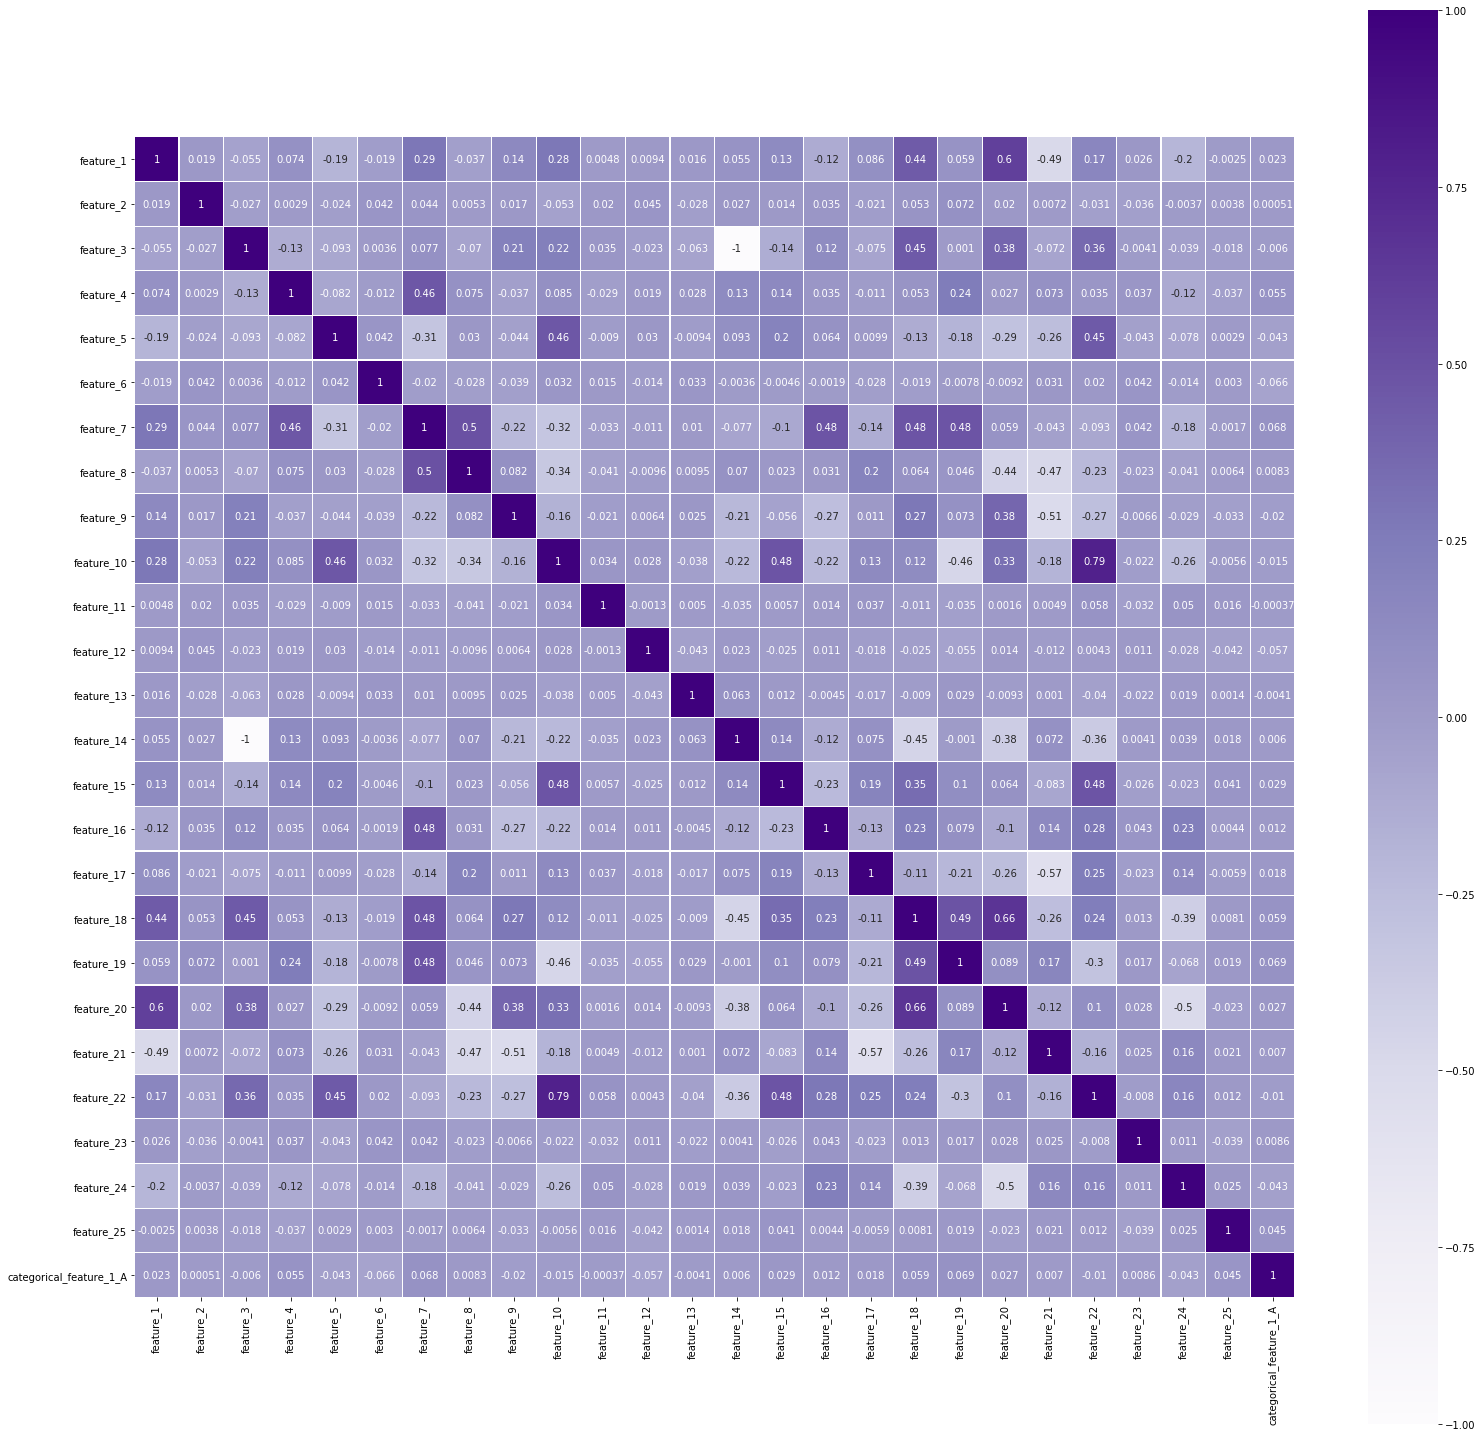

In [13]:
corr_matrix = features.corr()
fig, axes = plt.subplots(figsize=(26,26))     
sns.heatmap(corr_matrix,cmap='Purples', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":10}, square=True, ax=axes)
plt.show()

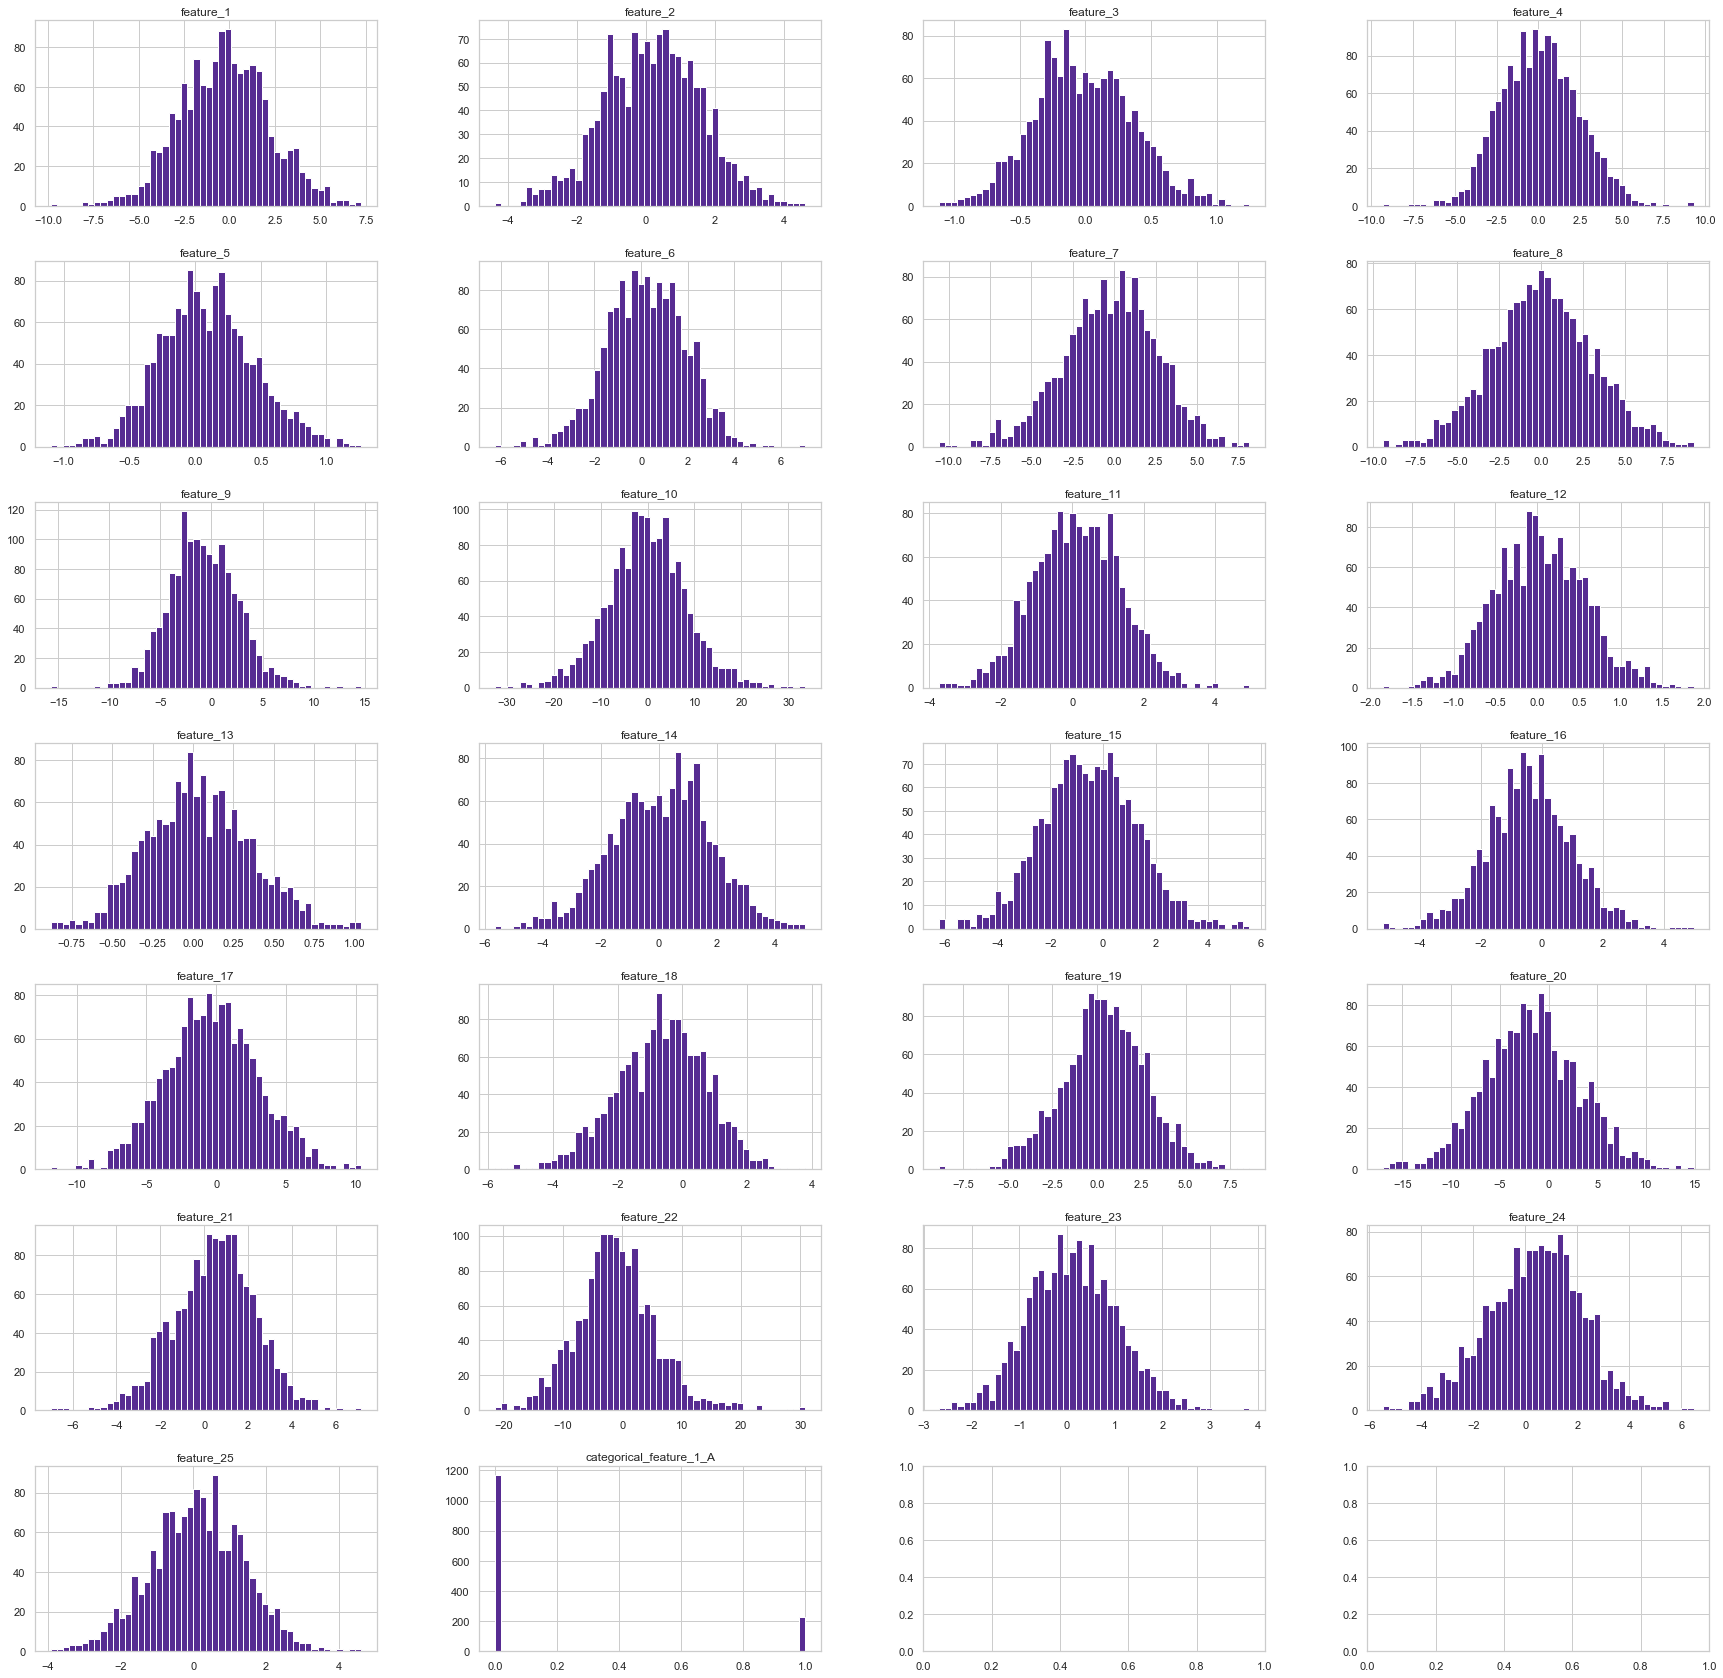

In [14]:
%matplotlib inline
sns.set(style='whitegrid', palette="Purples_r")

fig, axes = plt.subplots(nrows=7, ncols=4, figsize = (30,30)) 


rownumber=0
colnumber=0 

for col in features:
    features.hist(bins=50, column=str(col), ax=axes[rownumber,colnumber]) 
    colnumber+=1
    if colnumber==4: #Number of columns is 4, then it will go down to next row
        colnumber=0
        rownumber+=1

plt.show()
#Last two graphs are empty since there are 26 graphs. 7x4 is better than 13x2 visiually.

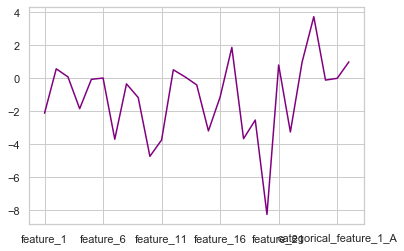

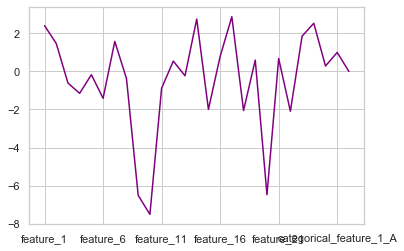

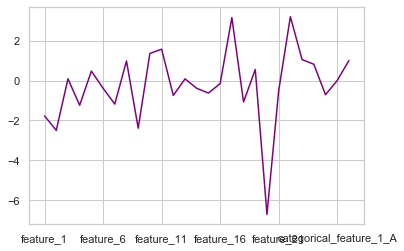

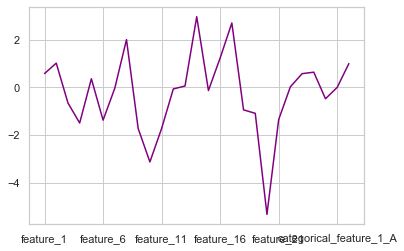

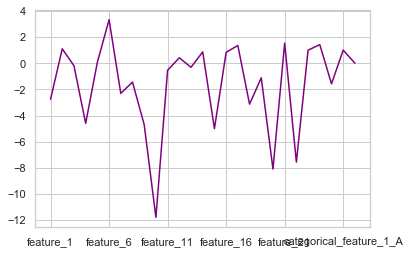

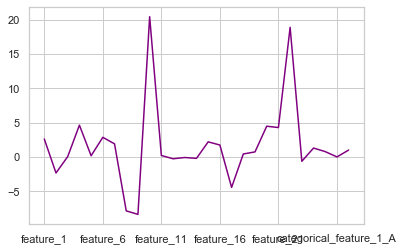

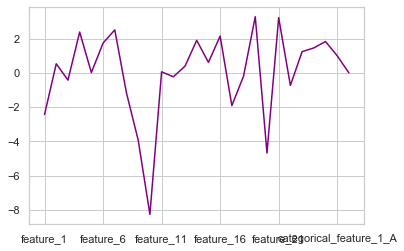

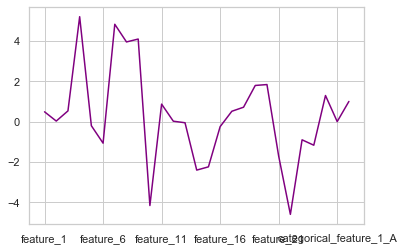

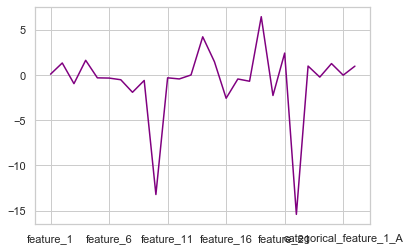

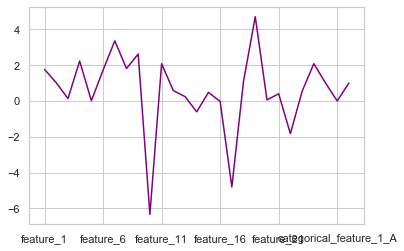

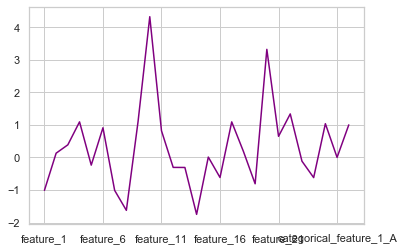

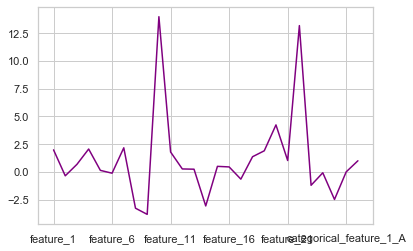

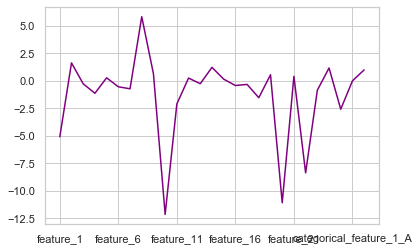

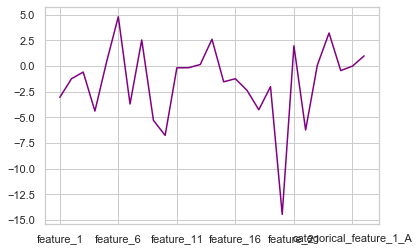

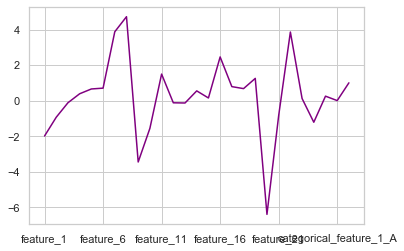

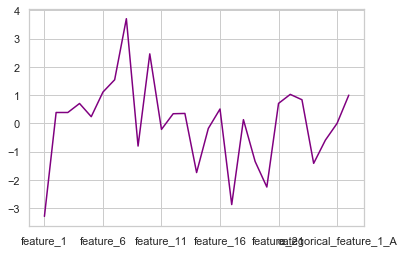

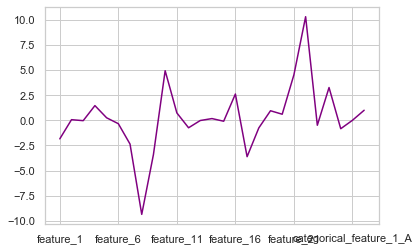

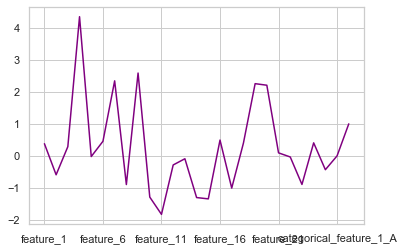

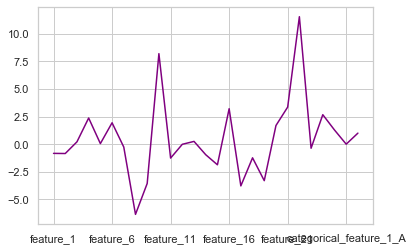

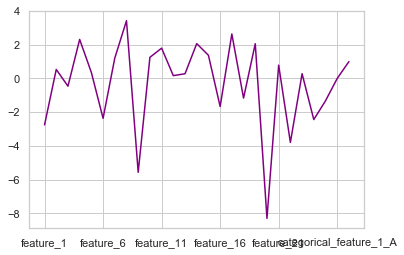

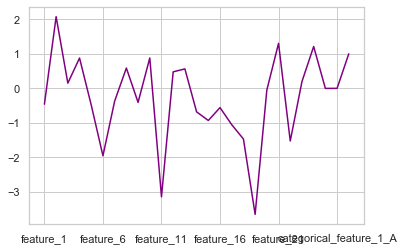

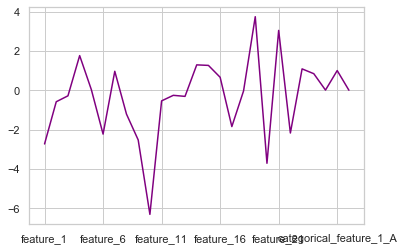

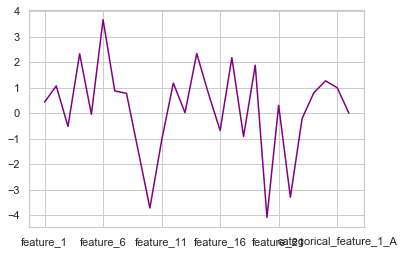

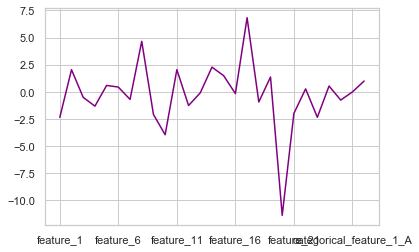

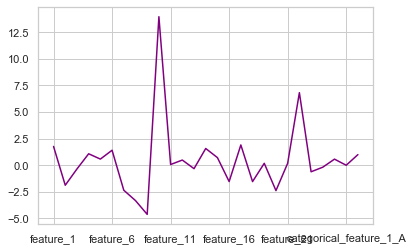

In [15]:
for i in range(25):
    df1=df.iloc[i]
    df1.plot(color='purple')
    plt.show()

# Scaling - Standardizing Numerical Features <a class="anchor" id="second-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [16]:
cat = features['categorical_feature_1_A']
numerical_features = features.drop(df.columns[25], axis = 1)
numerical_features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,-2.113796,0.577348,0.087791,-1.839633,-0.060875,0.019704,-3.688619,-0.335890,-1.160528,-4.724885,...,-1.126401,1.872541,-3.656041,-2.526945,-8.241272,0.807575,-3.249814,0.978852,3.734944,-0.104832
1,2.409436,1.471901,-0.609170,-1.150151,-0.171056,-1.412171,1.581023,-0.373758,-6.520269,-7.516506,...,0.792003,2.879667,-2.054909,0.598488,-6.480448,0.682403,-2.094288,1.853939,2.534741,0.286262
2,-1.771280,-2.495984,0.086363,-1.239414,0.471676,-0.386883,-1.179605,0.977900,-2.386664,1.358395,...,-0.154276,3.148815,-1.074409,0.552104,-6.701767,-0.513742,3.195394,1.046163,0.816403,-0.710283
3,0.579798,1.017622,-0.655840,-1.497616,0.360872,-1.378208,-0.037908,2.005586,-1.732446,-3.132189,...,1.233031,2.704834,-0.946023,-1.090917,-5.335178,-1.354106,0.024272,0.574348,0.637505,-0.479378
4,-2.754621,1.098809,-0.190576,-4.602054,0.073593,3.325360,-2.306778,-1.442855,-4.697841,-11.786836,...,0.829981,1.353834,-3.132287,-1.115342,-8.092975,1.528186,-7.562161,0.994263,1.419588,-1.577369


## MinMax Scaler

During the scaling process we cannot include categorical variable. If we do so, it means we are treating categorical values as continous values. Additionally it will result in our model believing that 1 is strictly bigger than 0. We are going to separate categorical feature and add it later on.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(numerical_features)
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
numerical_features_transformed = scaler.transform(numerical_features)
numerical_features_transformed

array([[0.45238779, 0.55138831, 0.50919933, ..., 0.56281156, 0.77142461,
        0.44782563],
       [0.7168026 , 0.65080415, 0.21498983, ..., 0.69709244, 0.67086075,
        0.49361132],
       [0.47241025, 0.20983424, 0.5085968 , ..., 0.57314023, 0.52688288,
        0.37694484],
       ...,
       [0.70676736, 0.22402144, 0.61853397, ..., 0.59010282, 0.37412203,
        0.2700397 ],
       [0.67686855, 0.66329699, 0.44865289, ..., 0.2941571 , 0.4863289 ,
        0.89597218],
       [0.57527813, 0.58246317, 0.53223075, ..., 0.51680435, 0.63556524,
        0.1179543 ]])

## Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler().fit(numerical_features)
sscaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
num_features_sscaled = sscaler.transform(numerical_features)
num_features_sscaled

array([[-0.74526477,  0.28291443,  0.28193944, ...,  0.93782789,
         1.8604468 , -0.15976081],
       [ 1.09172924,  0.91826731, -1.56307557, ...,  1.8925961 ,
         1.19985721,  0.14988233],
       [-0.60616082, -1.89991041,  0.27816088, ...,  1.01126714,
         0.25408731, -0.63911908],
       ...,
       [ 1.0220105 , -1.80924195,  0.96758704, ...,  1.13187506,
        -0.74937674, -1.36210571],
       [ 0.81429164,  0.99810737, -0.09775288, ..., -0.97236761,
        -0.01230595,  2.87100049],
       [ 0.1085029 ,  0.48150958,  0.42637161, ...,  0.61070598,
         0.9680061 , -2.39064103]])

# Principal Component Analysis <a class="anchor" id="third-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>
* PCA without Scaling (for Random Forest)
* PCA with MinMax Scaler
* PCA with Standard Scaler

It's less meaningful and problematic to apply PCA on categorical data. As we are trying to find the directions of high variance within data, we calculate the variance using squared deviations from the means. Concept of squared deviations is problematic with binary variables because standard PCA assumes a linear relationship between numerical data. There are other non-linear principal component analysis such as CATPCA, which ia beyond the scope of this course so will be skipped.



## PCA without Scaling (for RandomForest)

Text(0, 0.5, 'Explained Variance')

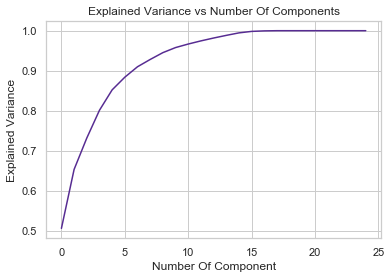

In [21]:
from sklearn.decomposition import PCA

#PCA on full dataset
pca = PCA(n_components=25)
pca.fit(numerical_features)

plt.plot(range(0, len(pca.explained_variance_)), np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance vs Number Of Components")
plt.xlabel("Number Of Component")
plt.ylabel("Explained Variance")

It can be seen that we can explain almost all the variability with only 15 features. This suggest that we may have colinearity problem regarding the rest of the features.

In [22]:
pca = PCA(n_components=0.95)
PrincipalC = pca.fit_transform(numerical_features)
pca.components_


array([[ 6.70005959e-02, -6.14798053e-03,  1.05943847e-02,
         1.23676904e-02,  1.49134711e-02,  4.43505188e-03,
        -7.07335810e-02, -1.00030422e-01, -5.77367624e-02,
         7.75421378e-01,  5.32925302e-03,  1.06166040e-03,
        -1.22879927e-03, -4.79436497e-02,  8.51377785e-02,
        -7.45523365e-03,  5.65535952e-02,  2.60718566e-02,
        -9.30767329e-02,  1.45994226e-01, -3.25443702e-02,
         5.74701983e-01, -1.35735973e-03, -2.26279237e-02,
        -4.60371207e-05],
       [ 2.18287411e-01,  7.41966440e-03,  1.50382177e-02,
         1.26407441e-02, -2.15128161e-02, -3.97542095e-03,
         2.07595997e-02, -1.80475521e-01,  3.10106750e-01,
         8.63014860e-02, -5.54252188e-03,  1.41679567e-03,
         5.49307415e-04, -6.80536964e-02, -2.98361316e-02,
        -6.09735938e-02, -2.32995423e-01,  1.30527605e-01,
         8.66271664e-02,  7.73435278e-01, -2.50093045e-02,
        -3.14984357e-01,  4.10662153e-03, -1.69150681e-01,
        -6.48395166e-03],
    

In [23]:
pca.explained_variance_ratio_

array([0.50621457, 0.14724556, 0.07833156, 0.06941876, 0.05101322,
       0.03165367, 0.02605449, 0.01821046, 0.01704498, 0.01265976])

In [24]:
Pcomponents = pd.DataFrame(data = PrincipalC
             , columns = ["PC1","PC2","PC3","PC4","PC5",
                          "PC6","PC7","PC8","PC9","PC10",])
Pcomponents.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,8.628019e-17,1.586033e-17,6.185528e-17,1.127669e-16,6.978545e-17,-2.790427e-17,-3.877850e-17,9.262432e-17,1.628410e-17,5.709718e-18
std,1.063505e+01,5.735792e+00,4.183508e+00,3.938317e+00,3.376087e+00,2.659404e+00,2.412757e+00,2.017125e+00,1.951509e+00,1.681841e+00
min,-3.864936e+01,-2.136259e+01,-1.210347e+01,-1.441119e+01,-1.211978e+01,-7.495216e+00,-7.267267e+00,-6.462709e+00,-6.237550e+00,-6.289829e+00
25%,-6.546957e+00,-3.860886e+00,-2.837530e+00,-2.669821e+00,-2.022105e+00,-1.895033e+00,-1.607690e+00,-1.326051e+00,-1.330052e+00,-1.167003e+00
50%,-1.510241e-01,-7.954709e-02,-3.313379e-02,-1.168672e-01,3.019000e-02,-1.126746e-03,-1.398397e-03,-5.728995e-02,-1.180523e-01,-7.893174e-03
75%,6.429404e+00,3.791126e+00,2.662118e+00,2.614722e+00,2.124946e+00,1.856187e+00,1.537275e+00,1.341527e+00,1.215993e+00,1.205977e+00
max,4.675698e+01,2.158823e+01,1.443669e+01,1.493386e+01,1.278768e+01,9.330820e+00,8.254936e+00,8.751425e+00,8.972161e+00,6.855154e+00


In [25]:
PComponents = Pcomponents.join(cat)
PComponents.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,categorical_feature_1_A
0,-5.597212,-6.757984,5.200844,1.318047,-2.929505,0.601341,1.516082,2.091027,0.988071,-0.078666,0
1,-6.820449,-6.477277,-2.378304,-1.301642,0.053556,6.416729,2.502923,-0.145322,2.710002,-1.305883,1
2,3.064974,-6.917915,-0.073427,1.775644,-1.085364,0.541511,0.365522,-0.404309,-1.519852,-0.795466,0
3,-2.125434,-4.960342,-1.205482,2.935162,-0.106156,1.756964,1.926821,-0.703833,1.720525,-1.439894,0
4,-13.710144,-6.427992,4.407491,-2.099030,-3.045177,3.727072,4.641700,0.996481,-1.083570,3.246681,1


From the principle component analysis we see that %95 of the variance can be captured with only 10 features. 
The capability to drop more than half of the features may result in faster computation and preventing overfitting.
 

## PCA with MinMax Scaler 

Text(0, 0.5, 'Explained Variance')

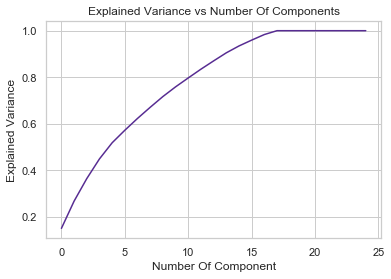

In [26]:
pca = PCA(n_components=25)
pca.fit(numerical_features_transformed)


plt.plot(range(0, len(pca.explained_variance_)), np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance vs Number Of Components")
plt.xlabel("Number Of Component")
plt.ylabel("Explained Variance")

In [27]:
pca_minmax = PCA(n_components=0.95)
PrincipalC_minmax = pca_minmax.fit_transform(numerical_features_transformed)
pca_minmax.components_


array([[-2.39788353e-01, -7.35232129e-03, -4.25034034e-01,
        -2.05411597e-02,  7.25820243e-02,  3.37972614e-03,
        -1.47311545e-01,  9.43659426e-02, -1.10807960e-01,
        -1.82411511e-01, -8.90877077e-03,  5.50553941e-03,
         3.42925176e-02,  4.25034034e-01, -8.27839285e-02,
        -4.05281879e-02,  6.63658671e-02, -4.34892576e-01,
        -8.33866658e-02, -4.41581167e-01,  1.14152608e-01,
        -1.84042840e-01, -9.01452704e-03,  2.16566415e-01,
         1.14307580e-02],
       [-3.61126103e-02, -6.08553372e-02,  5.50131134e-02,
        -1.32102430e-01,  3.46640195e-01,  1.85264641e-02,
        -4.77483433e-01, -2.69119505e-01, -1.68707840e-02,
         4.09658021e-01,  4.10717180e-02,  1.70393961e-02,
        -3.77461003e-02, -5.50131134e-02,  2.31112265e-01,
        -1.61039438e-01,  1.83303618e-01, -1.55303392e-01,
        -3.33399627e-01, -6.58912001e-03, -8.18037756e-02,
         3.44754055e-01, -3.40581124e-02,  6.38623763e-02,
         3.69118271e-03],
    

In [28]:
pca_minmax.explained_variance_ratio_

array([0.15092518, 0.11707447, 0.09676583, 0.08456947, 0.06923399,
       0.05382683, 0.05076772, 0.04777991, 0.0461198 , 0.04165232,
       0.03833725, 0.03763054, 0.03555286, 0.03468389, 0.02949711,
       0.02506087])

In [29]:
Pcomponents_minmax = pd.DataFrame(data = PrincipalC_minmax
             , columns = ["PC1","PC2","PC3","PC4","PC5",
                          "PC6","PC7","PC8","PC9","PC10",
                          "PC11","PC12","PC13","PC14","PC15","PC16"])

In [30]:
Pcomponents_minmax.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,-1.611806e-17,-4.147476e-17,-5.986283e-17,-6.644487e-17,-7.551003e-17,1.463115e-17,2.075721e-17,3.365859e-17,5.214083e-17,5.582836e-17,-6.324306e-17,5.259682e-17,3.183961e-17,-3.532888e-17,-1.752566e-17,8.703355e-18
std,2.806318e-01,2.471651e-01,2.247072e-01,2.100694e-01,1.900709e-01,1.675928e-01,1.627608e-01,1.578988e-01,1.551314e-01,1.474265e-01,1.414381e-01,1.401284e-01,1.362051e-01,1.345303e-01,1.240640e-01,1.143547e-01
min,-8.067900e-01,-7.979266e-01,-5.991299e-01,-7.150410e-01,-7.695714e-01,-4.861531e-01,-6.246611e-01,-4.904689e-01,-4.663518e-01,-4.366549e-01,-4.454558e-01,-4.185362e-01,-4.038760e-01,-4.728939e-01,-4.351438e-01,-3.639506e-01
25%,-1.894549e-01,-1.620602e-01,-1.635739e-01,-1.443833e-01,-1.225740e-01,-1.135922e-01,-1.144345e-01,-1.071591e-01,-1.048576e-01,-9.963533e-02,-9.424881e-02,-9.654658e-02,-9.291535e-02,-9.131099e-02,-8.060264e-02,-7.291489e-02
50%,-1.837368e-03,-1.031356e-03,1.802824e-02,-4.034323e-03,-3.828173e-03,4.320874e-03,5.869346e-03,2.388352e-03,2.458429e-03,1.648385e-03,2.043245e-03,4.884121e-04,3.535487e-03,-2.612429e-03,-1.721595e-03,-4.138793e-03
75%,2.055823e-01,1.576617e-01,1.515085e-01,1.479791e-01,1.181767e-01,1.147366e-01,1.054449e-01,1.092505e-01,1.053269e-01,9.350422e-02,1.003920e-01,9.483171e-02,8.965987e-02,8.676845e-02,8.650374e-02,6.380195e-02
max,8.907306e-01,8.339193e-01,6.878546e-01,7.890068e-01,9.012737e-01,5.310604e-01,6.902741e-01,5.512832e-01,6.028954e-01,5.196832e-01,4.535581e-01,5.284914e-01,5.719788e-01,4.897541e-01,4.865738e-01,4.390533e-01


After addition of onehotencoded categorical feature, the final form of principal components with minmax scaler is ready

In [31]:
PComponents_minmax = Pcomponents_minmax.join(cat)
PComponents_minmax.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,categorical_feature_1_A
0,0.366528,0.122955,0.303950,-0.138442,-0.240922,-0.002778,0.067325,0.048955,-0.144271,-0.091323,-0.003247,-0.343888,-0.280954,0.235459,0.012205,0.002217,0
1,0.372651,-0.163328,-0.092927,0.012711,0.077129,0.173538,0.328018,0.119839,-0.250321,0.070185,0.052974,-0.234085,-0.062859,0.021723,-0.118521,-0.090015,1
2,0.089278,0.169363,0.008031,-0.256067,-0.012410,-0.124909,-0.068413,0.259707,0.115992,-0.070294,0.145014,0.065168,0.162162,-0.150286,-0.068809,-0.002674,0
3,0.301471,0.004864,-0.300144,-0.071404,0.042459,0.048105,0.016713,0.013452,-0.157901,0.011282,0.156334,-0.128691,-0.223538,-0.067399,-0.105484,-0.100099,0
4,0.436134,-0.038566,0.364873,-0.064212,-0.156267,0.245383,0.034839,0.036826,-0.295116,-0.036466,0.169850,-0.089317,0.000483,-0.021052,0.217021,-0.107041,1


## PCA with Standard Scaler 

Text(0, 0.5, 'Explained Variance')

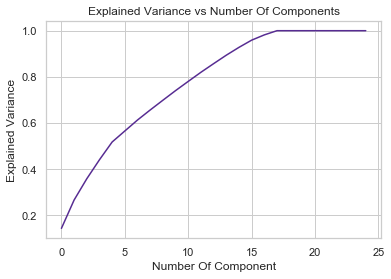

In [32]:
#PCA object on full dataset
pca = PCA(n_components=25)
pca.fit(num_features_sscaled)

#Plotting the the explained variance vs the number of components
plt.plot(range(0, len(pca.explained_variance_)), np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance vs Number Of Components")
plt.xlabel("Number Of Component")
plt.ylabel("Explained Variance")

In [33]:
pca_stan = PCA(n_components=0.95)
PrincipalC_stan = pca_stan.fit_transform(num_features_sscaled)
pca_stan.components_

array([[ 2.89339152e-01,  1.60711203e-03,  3.43545633e-01,
         2.70127182e-02,  7.68303850e-03, -4.19993476e-03,
         8.68808525e-02, -8.01580770e-02,  1.63071820e-01,
         2.97441689e-01,  1.22449342e-02, -9.51763030e-04,
        -2.53032978e-02, -3.43545633e-01,  1.57584268e-01,
        -1.34612419e-04,  4.75063991e-03,  4.27588081e-01,
         3.49989840e-02,  4.19471083e-01, -2.09540541e-01,
         2.75018899e-01,  2.83915906e-03, -2.12296144e-01,
        -1.04792291e-02],
       [-6.79535794e-02, -5.21965656e-02, -3.62993150e-02,
        -1.40793658e-01,  3.37880420e-01,  2.30544748e-02,
        -4.21192964e-01, -1.59043355e-01, -8.96691429e-02,
         4.14518058e-01,  4.02452734e-02,  1.86653148e-02,
        -2.21532763e-02,  3.62993150e-02,  1.97483133e-01,
        -1.46620988e-01,  2.10608984e-01, -2.39038517e-01,
        -3.90018179e-01, -1.20402498e-01, -8.97857693e-02,
         3.50614188e-01, -3.63642802e-02,  9.75694016e-02,
         6.65914267e-03],
    

In [34]:
pca_stan.explained_variance_ratio_

array([0.14376228, 0.12274186, 0.09213863, 0.08230545, 0.07697455,
       0.04765725, 0.04754739, 0.0434497 , 0.04215936, 0.04169458,
       0.03997557, 0.03947498, 0.03731642, 0.03665184, 0.03398069,
       0.03120385])

In [35]:
Pcomponents_stan = pd.DataFrame(data = PrincipalC_stan
             , columns = ["PC1","PC2","PC3","PC4","PC5",
                          "PC6","PC7","PC8","PC9","PC10",
                          "PC11","PC12","PC13","PC14","PC15","PC16"])

In [36]:
Pcomponents_stan.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,-4.155406e-17,1.094363e-16,-1.950820e-17,-2.712116e-17,1.778339e-17,-2.422665e-17,2.862789e-17,-9.516197e-18,1.304512e-17,3.996803e-17,1.736706e-17,2.632815e-17,-1.998401e-17,2.141144e-17,2.157005e-17,1.490871e-17
std,1.896477e+00,1.752353e+00,1.518260e+00,1.434959e+00,1.387710e+00,1.091917e+00,1.090658e+00,1.042602e+00,1.027004e+00,1.021327e+00,1.000052e+00,9.937706e-01,9.662181e-01,9.575756e-01,9.220219e-01,8.835462e-01
min,-5.886803e+00,-5.728778e+00,-4.417736e+00,-5.662162e+00,-4.989169e+00,-3.335457e+00,-3.583008e+00,-3.100814e+00,-3.274807e+00,-3.042231e+00,-3.068779e+00,-3.202687e+00,-3.647470e+00,-3.011601e+00,-2.675527e+00,-2.628524e+00
25%,-1.327937e+00,-1.167806e+00,-1.055262e+00,-9.229483e-01,-9.474533e-01,-7.245524e-01,-7.411604e-01,-7.164830e-01,-6.935465e-01,-6.867276e-01,-6.778430e-01,-6.609042e-01,-7.009922e-01,-6.053120e-01,-6.136437e-01,-6.176153e-01
50%,-1.130478e-02,6.755309e-02,8.975369e-02,-8.998467e-02,-2.836804e-02,9.176419e-03,-2.904605e-02,3.028132e-02,3.552473e-03,1.041447e-02,-7.413604e-03,-9.819357e-03,1.278406e-03,1.904983e-02,2.073624e-02,-2.513106e-02
75%,1.239743e+00,1.175834e+00,9.979479e-01,8.472989e-01,9.681417e-01,7.366881e-01,7.524203e-01,7.509316e-01,6.708858e-01,6.987020e-01,6.318883e-01,6.466629e-01,6.700361e-01,6.386558e-01,5.995206e-01,5.094570e-01
max,6.584051e+00,5.858029e+00,5.044156e+00,6.505281e+00,5.814612e+00,3.484707e+00,3.629636e+00,3.472638e+00,3.863132e+00,3.250825e+00,5.079748e+00,3.486405e+00,4.679458e+00,3.193668e+00,3.165584e+00,3.582367e+00


After addition of onehotencoded categorical feature, the final form of principal components with minmax scaler is ready

In [37]:
PComponents_stan = Pcomponents_stan.join(cat)
PComponents_stan.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,categorical_feature_1_A
0,-2.637535,1.276954,1.019831,-1.324541,-1.680612,-1.265952,-0.042896,0.871490,0.424752,-1.329283,-1.404433,1.316170,-1.702515,-1.991915,-0.390064,-0.236569,0
1,-2.511408,-0.442248,-0.769227,1.199975,0.293353,-2.234086,1.758341,-0.713257,0.696111,-0.774845,-1.914603,0.874931,-0.126574,0.058356,-0.525493,-0.799612,1
2,-0.376865,1.361447,0.016052,0.751944,-1.441963,0.205213,0.296553,1.915626,-0.488921,0.074324,0.267752,-0.488401,1.134915,1.715518,0.113213,-0.357701,0
3,-1.439928,0.646955,-2.030623,0.957709,-0.319594,-0.873173,-0.071886,-0.209708,0.011632,-0.201313,-1.211545,1.910774,-0.856307,0.891489,-0.308128,-0.332577,0
4,-3.479957,0.246785,1.717561,-0.858482,-1.267070,-2.307769,-0.310505,-1.133508,-1.141316,-1.260672,-0.919623,-0.445506,-0.945805,0.588737,0.968758,-0.802377,1


# Train - Test Split <a class="anchor" id="fourth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>
* Train - Test Split All Features / Without PCA and Scaling
* Train - Test Split PCA without Scaling 
* Train - Test Split PCA with MinMax Scaler
* Train - Test Split PCA with Standard Scaler

## Train - Test Split All Features / Without PCA-Scaling

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.20, random_state = 39)
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,categorical_feature_1_A
551,-2.603358,-3.568984,0.184663,1.631629,0.548138,2.306471,-1.811206,2.061084,1.980514,2.073579,...,2.432402,-2.101730,-1.683297,-6.608195,-1.540155,0.808781,0.730023,0.931032,-2.094900,0
357,1.202616,-0.897304,-0.457027,-2.219256,0.465119,-1.372603,-4.423191,-2.849957,2.584046,7.793009,...,4.260061,0.917610,-0.012859,3.553924,-1.983856,3.535762,-0.635891,-1.695738,0.632414,0
20,-0.459557,2.075961,0.150468,0.878174,-0.485544,-1.953978,-0.369801,0.588467,-0.406854,0.879734,...,-1.053601,-1.467112,-3.651729,-0.049960,1.304216,-1.525279,0.196739,1.212484,-0.002121,0
307,0.714931,1.486672,-0.138741,-0.286716,-0.378516,0.727776,1.793144,1.112089,3.157457,-14.364390,...,-4.075952,0.531481,3.245460,2.490658,0.790101,-13.806685,0.655142,-0.575696,0.639155,0
745,-3.658456,1.446842,0.507007,-1.650466,-0.005232,1.180690,0.275059,1.237924,1.221373,-7.528547,...,-1.587961,-0.020130,-0.547497,-2.240426,0.891841,-0.911595,0.760736,1.130024,-3.058899,0


1    566
0    554
Name: label, dtype: int64


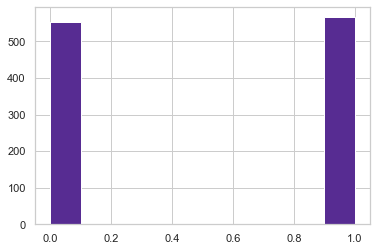

In [39]:
y_train.hist()
print(y_train.value_counts())

## Train - Test Split PCA without Scaling

In [40]:
PC_X_train, PC_X_test, PC_y_train, PC_y_test = train_test_split(PComponents, y, test_size = 0.20, random_state = 40)
PC_X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,categorical_feature_1_A
862,3.684084,2.528165,2.518675,4.530531,1.806787,-3.132301,-1.804672,3.516304,1.811524,1.850303,1
1193,7.226469,-2.672237,2.918876,5.252456,-4.661328,1.055898,0.878676,-1.773524,-1.351267,0.623039,0
995,3.907609,-0.984275,-4.344899,-7.400274,-3.881612,0.607688,-1.748871,-2.081590,0.084479,1.818455,0
1023,-14.178079,-3.385066,6.980789,0.196270,2.316491,-1.039702,4.286241,0.805832,0.200649,1.223401,0
554,-19.376416,-11.437703,2.940918,1.431266,-0.012375,-0.145175,3.212184,1.187317,0.194414,-1.512833,0


1    562
0    558
Name: label, dtype: int64


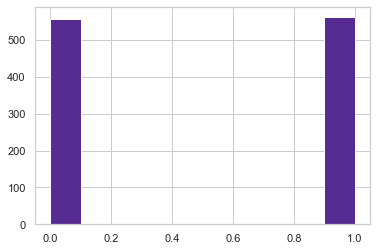

In [41]:
PC_y_train.hist()
print(PC_y_train.value_counts())

## Train - Test Split PCA with MinMax Scaler

In [42]:
PCminmax_X_train, PCminmax_X_test, PCminmax_y_train, PCminmax_y_test = train_test_split(PComponents_minmax, y, test_size = 0.20, random_state = 41)
PCminmax_X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,categorical_feature_1_A
1001,-0.309767,-0.258396,0.143614,-0.348447,-0.036391,-0.033855,-0.157554,-0.034407,-0.267115,-0.237441,-0.167491,0.077617,-0.049057,0.002361,0.137476,-0.075779,1
427,0.044401,0.053279,0.369609,-0.039152,-0.009195,0.002178,-0.129069,0.133766,0.061979,-0.022081,-0.010983,-0.086467,-0.062167,-0.024714,-0.058992,-0.060902,0
1281,0.184437,-0.557123,0.096042,0.014994,0.036763,-0.082419,-0.081469,0.232998,-0.071206,-0.144713,0.137385,0.031495,-0.177155,-0.127342,0.049702,-0.211991,0
1147,0.028430,-0.519765,0.076396,0.170857,-0.013423,0.061504,-0.092509,0.336344,-0.236872,0.011080,0.120580,-0.044787,-0.121658,0.030359,0.232441,0.149930,0
1177,0.197269,-0.097976,-0.338701,0.115648,-0.060841,0.255046,0.143668,0.123282,-0.271322,-0.357879,0.003466,0.061033,-0.011948,0.140691,-0.014876,0.009263,1


1    560
0    560
Name: label, dtype: int64


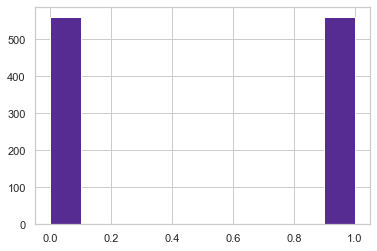

In [43]:
PCminmax_y_train.hist()
print(PCminmax_y_train.value_counts())


## Train - Test Split PCA with Standard Scaler

In [44]:
PCstan_X_train, PCstan_X_test, PCstan_y_train, PCstan_y_test = train_test_split(PComponents_stan, y, test_size = 0.20, random_state=42)
PCstan_X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,categorical_feature_1_A
1121,-0.566990,0.140427,2.555590,-0.285182,-0.905386,-0.825747,-0.230109,0.210323,0.466318,1.513827,-0.449830,1.032223,0.872553,0.235496,-0.534648,-0.669580,0
48,-0.050917,-1.023757,-1.160159,1.392861,-1.083846,-0.631088,1.854587,-0.579519,1.274036,-0.076384,-1.923052,0.274667,-0.057337,-0.214421,0.000734,-0.643957,0
155,0.395391,-0.247907,-3.121879,-2.464046,0.169974,1.842333,-0.711657,-0.533631,2.786515,-0.685251,-0.616111,1.261922,-0.177690,0.104093,0.825586,-1.073475,0
306,2.108933,-0.629197,-2.082740,0.280347,0.136930,-0.052689,-1.316900,0.977975,0.113734,0.532078,-0.222762,0.047459,-1.607700,-0.120670,-0.534440,-0.404407,1
1287,1.116251,0.288467,-2.100675,-1.080222,1.725186,-0.236191,-0.314449,0.067619,1.328120,-0.554239,-1.013939,-0.990248,-1.355399,-0.308157,-0.799236,-0.742313,1


1    566
0    554
Name: label, dtype: int64


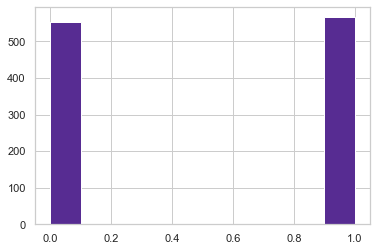

In [45]:
PCstan_y_train.hist()
print(PCstan_y_train.value_counts())

# Training Models <a class="anchor" id="fifth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [46]:
def model_evaluation(y_test , y_pred):
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    pass

## Logistic Regression

### 1) Logistic Regression -- Data with All Features without PCA and Scaling

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predict1 = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, logreg_predict1)

We use the F1 score because we do not prefer precision to recall or vice versa. Our labels are evenly distributed. We do not give more importance to False negative such as someone having a cancer.

In [48]:
model_evaluation(y_test, logreg_predict1)

Accuracy: 0.7642857142857142
Precision: 0.7862595419847328
Recall: 0.7304964539007093
F1 score: 0.7573529411764706


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logreg_predict1)

array([[111,  28],
       [ 38, 103]])

### 2) Logistic Regression -- Data with Principal Components and Standard Scaler

In [50]:
logreg = LogisticRegression()
logreg.fit(PCstan_X_train, PCstan_y_train)
logreg_predict2 = logreg.predict(PCstan_X_test)
accuracy_logreg_stan = accuracy_score(PCstan_y_test, logreg_predict2)

In [51]:
model_evaluation(PCstan_y_test, logreg_predict2)

Accuracy: 0.75
Precision: 0.7795275590551181
Recall: 0.7021276595744681
F1 score: 0.7388059701492536


In [52]:
confusion_matrix(PCstan_y_test, logreg_predict2)

array([[111,  28],
       [ 42,  99]])

### 3) Logistic Regression -- Data with Principal Components and MinMax Scaler

In [53]:
logreg = LogisticRegression()
logreg.fit(PCminmax_X_train, PCminmax_y_train)
logreg_predict3 = logreg.predict(PCminmax_X_test)
accuracy_logreg_minmax = accuracy_score(PCminmax_y_test, logreg_predict3)

In [54]:
model_evaluation(PCminmax_y_test, logreg_predict3)

Accuracy: 0.7178571428571429
Precision: 0.7361111111111112
Recall: 0.7210884353741497
F1 score: 0.7285223367697595


In [55]:
confusion_matrix(PCstan_y_test, logreg_predict3)

array([[64, 75],
       [72, 69]])

Highest evaluation scores were reached with the data including all features when PCA and Scaling were not applied. So we are going to use this data for the hyperparameter tuning. 

Actually, it took more time to tune the hyperparameters using the without PCA-Scaling data; and, max number of iterations were reached multiple time even though max_iter parameter was set to 1000. By ranking according to the accuracy and precision scores, data with PCA and Standard Scaling was used. The results we got from the GridSearchCV was not only faster but had a better score too.


In [56]:
print('Parameters currently in use:\n')
print(logreg.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


## Hyperparameter Tuning Logistic Regression

In [57]:
%%time
from sklearn.model_selection import GridSearchCV
parameters = [{"penalty":["l1","l2"],"C":np.logspace(-4,4,50), "solver":["liblinear"]},
             {"penalty":["elasticnet"], "l1_ratio":range(0,1,20), "C":np.logspace(-4,4,50), "solver": ["saga"]},
             {"penalty":["l1","l2"], "C":np.logspace(-4,4,50), "solver":["saga"]}  
             ]

logreg = LogisticRegression(max_iter = 500)
logreg_grid = GridSearchCV(logreg, parameters)
logreg_grid.fit(PCstan_X_train, PCstan_y_train)



CPU times: user 8.66 s, sys: 34.8 ms, total: 8.69 s
Wall time: 8.71 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.

In [58]:
print("Best Validation Score of Logistic Regression: ", logreg_grid.best_score_)
print('Best Penalty:', logreg_grid.best_estimator_.get_params()['penalty'])
print('Best Solver:', logreg_grid.best_estimator_.get_params()['solver'])
print('Best C:', logreg_grid.best_estimator_.get_params()['C'])

print(logreg_grid.best_estimator_.get_params())

Best Validation Score of Logistic Regression:  0.7642857142857142
Best Penalty: elasticnet
Best Solver: saga
Best C: 0.013257113655901081
{'C': 0.013257113655901081, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [60]:
print("Accuracy Score obtained through Logistic Regression is:\n ", logreg_grid.score(PCstan_X_test,PCstan_y_test))

Accuracy Score obtained through Logistic Regression is:
  0.7607142857142857


In [61]:
best_logreg=logreg_grid.best_estimator_

<br><br><br><br><br>

## Random Forest Classifier

One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don't require feature scaling or centering at all.

### 1) RandomForestClassifier -- Data with All Features without PCA and Scaling

In [62]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_predict1 = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predict1)
print("the first test accuracy of Random Forrect Classifier is:", accuracy_rf)

the first test accuracy of Random Forrect Classifier is: 0.9


In [63]:
model_evaluation(y_test, rf_predict1)

Accuracy: 0.9
Precision: 0.9064748201438849
Recall: 0.8936170212765957
F1 score: 0.9


In [64]:
confusion_matrix(y_test, rf_predict1)

array([[126,  13],
       [ 15, 126]])

### 2) RandomForestClassifier -- Data with only PCA

In [65]:
random_forest = RandomForestClassifier()
random_forest.fit(PC_X_train, PC_y_train)
rf_predict2 = random_forest.predict(PC_X_test)
accuracy_rf = accuracy_score(PC_y_test, rf_predict2)
print("the first test accuracy of Random Forrect Classifier is:", accuracy_rf)

the first test accuracy of Random Forrect Classifier is: 0.825


In [66]:
model_evaluation(PC_y_test, rf_predict2)

Accuracy: 0.825
Precision: 0.8380281690140845
Recall: 0.8206896551724138
F1 score: 0.8292682926829268


In [67]:
confusion_matrix(PC_y_test, rf_predict2)

array([[112,  23],
       [ 26, 119]])

Highest evaluation scores were reached using the data where PCA and scaling weren't applied. We're going to tune the hyperparameters using this data.

In [68]:
print('Parameters currently in use:\n')
print(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Hyperparameter Tuning RandomForest Classifier


RandomizedSearchCV is used instead of GridSearchCV because it takes more time to search all combinations of parameters using GridSearchCV.

In [69]:
%%time
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'criterion':['gini','entropy'],"n_estimators": [100,200,300], 
               'bootstrap':[True,False]}]

scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, parameters, cv=5, scoring=scorers, refit='accuracy_score')
rf_random.fit(X_train, y_train)


CPU times: user 44.4 s, sys: 281 ms, total: 44.7 s
Wall time: 45.5 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
print("Best Validation Score of Random Forest: ", rf_random.best_score_)
print('Optimal Number of Estimators:', rf_random.best_estimator_.get_params()['n_estimators'])
print('Bootstrap:', rf_random.best_estimator_.get_params()['bootstrap'])
print('Criterion:', rf_random.best_estimator_.get_params()['criterion'])


print(rf_random.best_estimator_.get_params())

Best Validation Score of Random Forest:  0.875
Optimal Number of Estimators: 200
Bootstrap: False
Criterion: gini
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [71]:
results=pd.DataFrame(rf_random.cv_results_)[['param_bootstrap','param_criterion','param_n_estimators','mean_test_accuracy_score','mean_test_precision_score',
                                                   'mean_test_recall_score','mean_test_f1_score']]
results.nlargest(10, ['mean_test_accuracy_score'])
    

,param_bootstrap,param_criterion,param_n_estimators,mean_test_accuracy_score,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score
5,False,gini,200,0.875000,0.882961,0.869259,0.875626
2,False,entropy,300,0.869643,0.881042,0.858578,0.868861
4,True,gini,200,0.862500,0.863883,0.863919,0.863553
3,True,entropy,300,0.861607,0.867092,0.858609,0.861908
7,False,gini,100,0.859821,0.866125,0.855131,0.860122
1,True,entropy,200,0.859821,0.859976,0.863934,0.861313
0,False,entropy,100,0.858929,0.860232,0.860363,0.859859
9,True,gini,100,0.858036,0.865520,0.851560,0.858106
6,False,entropy,200,0.857143,0.860996,0.856839,0.858244
8,True,entropy,100,0.855357,0.865119,0.846251,0.855066


In [72]:
print("Score obtained through RandomForestClassifier is:\n ", rf_random.score(X_test,y_test))

Score obtained through RandomForestClassifier is:
  0.8714285714285714


In [73]:
best_rf=rf_random.best_estimator_

## Extra Classifier - Multilayer Perceptron Classifier <a class="anchor" id="seventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

### MLP Classifier -- Data with All Features without PCA and Scaling 

In [76]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 1500, random_state=48)
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, mlp_predict)
print("Accuracy of MLP is:", accuracy_mlp)


Accuracy of MLP is: 0.8464285714285714


### MLP Classifier -- Data with Principal Components and MinMax Scaler

In [77]:
mlp = MLPClassifier(max_iter = 1500, random_state=49)
mlp.fit(PCminmax_X_train, PCminmax_y_train)
mlp_predict2 = mlp.predict(PCminmax_X_test)
accuracy_mlp2 = accuracy_score(PCminmax_y_test, mlp_predict2)
print("Accuracy of MLP is:", accuracy_mlp2)

Accuracy of MLP is: 0.8607142857142858


In [78]:
%%time
parameters = [{'activation':['identity','logistic'],"solver": ['lbfgs','sgd'], 
               "learning_rate" : ["constant","adaptive"], "max_iter":[10000] }]


mlp = MLPClassifier(max_iter = 1200, random_state = 50)
mlp_grid = GridSearchCV(mlp, parameters, cv=5)
mlp_grid.fit(X_train, y_train)


CPU times: user 1min 29s, sys: 5.85 s, total: 1min 35s
Wall time: 48.2 s


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=50, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[

In [92]:
print("Best Validation Score of MLP: ", mlp_grid.best_score_)
print('Activation:', mlp_grid.best_estimator_.get_params()['activation'])
print('Solver:', mlp_grid.best_estimator_.get_params()['solver'])
print('Learning Rate:', mlp_grid.best_estimator_.get_params()['learning_rate'])


print(mlp_grid.best_estimator_.get_params())



Best Validation Score of MLP:  0.8392857142857142
Activation: logistic
Solver: lbfgs
Learning Rate: constant
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 10000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 50, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [82]:
print("Score obtained through Multi-layer Perceptron Classifier is:\n ", mlp_grid.score(X_test,y_test))

Score obtained through Multi-layer Perceptron Classifier is:
  0.8607142857142858


In [93]:
best_mlp=mlp_grid.best_estimator_

# Performance Check <a class="anchor" id="eighth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

### Performance Check of Logistic Regression 

In [84]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

best_logreg.fit(X_train, y_train)

best_logreg_prediction=best_logreg.predict(X_test)
targets = ['0', '1']

print(classification_report(y_test, best_logreg_prediction, target_names=targets))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       139
           1       0.78      0.74      0.76       141

    accuracy                           0.76       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.76      0.76      0.76       280



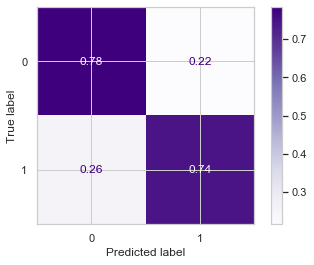

In [85]:
plot_confusion_matrix(best_logreg, X_test, y_test, display_labels=targets, normalize='true',cmap='Purples')

In [86]:
best_rf.fit(X_train,y_train)

best_rf_prediction=best_rf.predict(X_test)
targets = ['0', '1']

print(classification_report(y_test, best_rf_prediction, target_names=targets))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       139
           1       0.90      0.88      0.89       141

    accuracy                           0.89       280
   macro avg       0.89      0.89      0.89       280
weighted avg       0.89      0.89      0.89       280



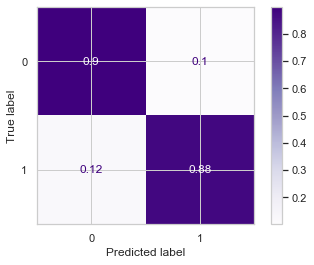

In [87]:
plot_confusion_matrix(best_rf, X_test, y_test, display_labels=targets, normalize='true',cmap='Purples')

In [94]:
best_mlp.fit(X_train,y_train)

best_mlp_prediction=best_mlp.predict(X_test)
targets = ['0', '1']

print(classification_report(y_test, best_mlp_prediction, target_names=targets))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       139
           1       0.85      0.88      0.86       141

    accuracy                           0.86       280
   macro avg       0.86      0.86      0.86       280
weighted avg       0.86      0.86      0.86       280



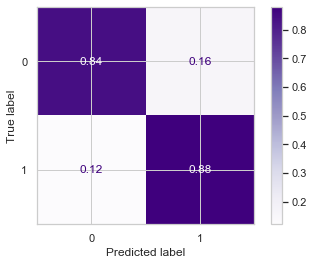

In [95]:
plot_confusion_matrix(best_mlp, X_test, y_test, display_labels=targets, normalize='true',cmap='Purples')

# Conclusion <a class="anchor" id="ninth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

The task was to choose between the RandomForestClassifier and Logistic Regression model for the given data set. Additional MulilayerPerceptron Classifier was implemented.

In [96]:
print(f"The optimal parameters for the LogisticRegression are \n{logreg_grid.best_params_} \n with a test accuracy of 76% \n")
print(f"\nThe optimal parameters for the RandomForestClassifier are  \n{rf_random.best_params_} \n with a test accuracy of 87% \n")
print(f"\nThe optimal parameters for the MultilayerPerceptronClassifier are \n{mlp_grid.best_params_} \n with a test accuracy of 86% ")

The optimal parameters for the LogisticRegression are 
{'C': 0.013257113655901081, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'} 
 with a test accuracy of 76% 


The optimal parameters for the RandomForestClassifier are  
{'n_estimators': 200, 'criterion': 'gini', 'bootstrap': False} 
 with a test accuracy of 87% 


The optimal parameters for the MultilayerPerceptronClassifier are 
{'activation': 'logistic', 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'lbfgs'} 
 with a test accuracy of 86% 


It's seen that RandomForestClassifier is the best model among these 3 models for the given data. It has the greatest accuracy score among 3 models. It's also observable that RandomForestClassifier has the superior precision, recall and F1 scores compared to the LogisticRegression and MLPClassifier
